In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df =  pd.read_csv("Admission.csv")
df.head()

,GPA,GMAT,Decision
0,2.96,596,admit
1,3.14,473,admit
2,3.22,482,admit
3,3.29,527,admit
4,3.69,505,admit


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GPA       85 non-null     float64
 1   GMAT      85 non-null     int64  
 2   Decision  85 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [9]:
df.describe()

,GPA,GMAT
count,85.000000,85.000000
mean,2.974588,488.447059
std,0.428995,81.522347
min,2.130000,313.000000
25%,2.600000,425.000000
50%,3.010000,482.000000
75%,3.300000,538.000000
max,3.800000,693.000000


In [11]:
df["Decision"].unique()

array(['admit', 'notadmit', 'border'], dtype=object)

In [13]:
import seaborn as sns

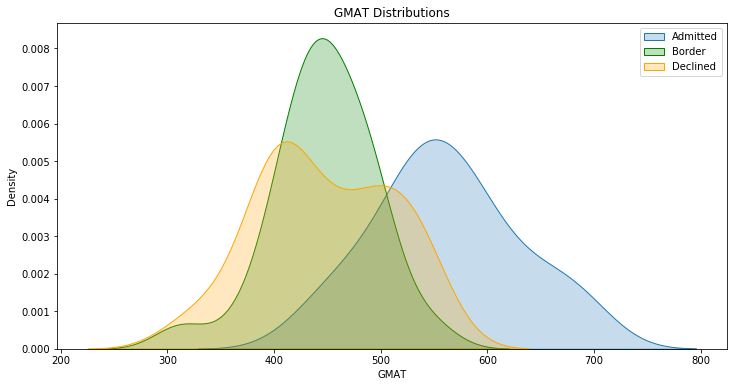

In [14]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df[df["Decision"]=="admit"],x="GMAT",shade=True,label="Admitted")
sns.kdeplot(data=df[df["Decision"]=="border"],x="GMAT",color="green",shade=True,label="Border")
sns.kdeplot(data=df[df["Decision"]=="notadmit"],x="GMAT",color="orange",shade=True,label="Declined")

plt.title("GMAT Distributions")
plt.legend()

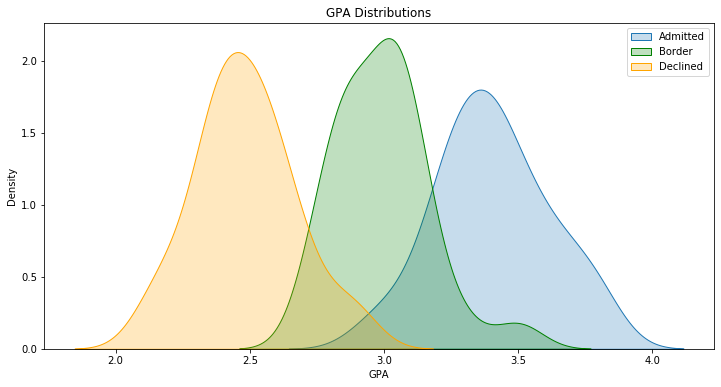

In [15]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df[df["Decision"]=="admit"],x="GPA",shade=True,label="Admitted")
sns.kdeplot(data=df[df["Decision"]=="border"],x="GPA",color="green",shade=True,label="Border")
sns.kdeplot(data=df[df["Decision"]=="notadmit"],x="GPA",color="orange",shade=True,label="Declined")

plt.title("GPA Distributions")
plt.legend()

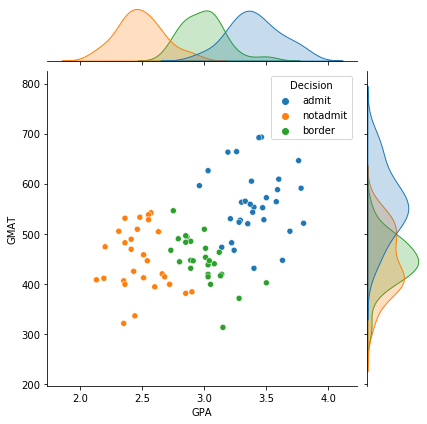

In [16]:
sns.jointplot(data=df,x="GPA",y="GMAT",hue="Decision")

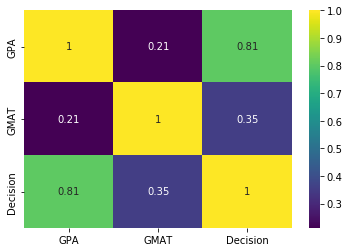

In [17]:
ndf = df.copy()

ndf["Decision"] = ndf["Decision"].astype("category")
ndf["Decision"] = ndf["Decision"].cat.codes

sns.heatmap(ndf.corr()**2,annot=True,cmap="viridis")

In [18]:
ndf.head()

,GPA,GMAT,Decision
0,2.96,596,0
1,3.14,473,0
2,3.22,482,0
3,3.29,527,0
4,3.69,505,0


In [19]:
X = ndf.drop("Decision",axis=1)

y = ndf["Decision"]

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier()
knn = KNeighborsClassifier()
logmod = LogisticRegression()

rfr.fit(X_train, y_train)
knn.fit(X_train, y_train)
logmod.fit(X_train, y_train)

print("Random Forest Regressor Score: {:.2f}".format(rfr.score(X_test, y_test)))
print("K Nearest Neighbors Score: {:.2f}".format(knn.score(X_test, y_test)))
print("Logistic Regression Score: {:.2f}".format(logmod.score(X_test, y_test)))

Random Forest Regressor Score: 0.91
K Nearest Neighbors Score: 0.95
Logistic Regression Score: 0.95


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/tree/tree.py:163: DeprecationWarning: `np.int` is a deprecated